In [1]:
import pandas as pd

rasff=pd.read_csv(r"F:\Final_project\rasff_new2.csv")

In [33]:
df=pd.read_csv(r"F:\Final_project\df_keyword.csv")

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27397 entries, 0 to 27396
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   reference                  27397 non-null  float64
 1   category                   27397 non-null  object 
 2   type                       27397 non-null  object 
 3   subject                    27397 non-null  object 
 4   date                       27397 non-null  object 
 5   notifying_country          27397 non-null  object 
 6   classification             27397 non-null  object 
 7   risk_decision              27397 non-null  object 
 8   distribution               18759 non-null  object 
 9   forAttention               14966 non-null  object 
 10  forFollowUp                13810 non-null  object 
 11  operator                   27303 non-null  object 
 12  origin                     26823 non-null  object 
 13  hazards                    20241 non-null  obj

In [36]:
df['simplified_hazard'].nunique()

1641

In [2]:
rasff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27397 entries, 0 to 27396
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   reference              27397 non-null  float64
 1   category               27397 non-null  object 
 2   type                   27397 non-null  object 
 3   subject                27397 non-null  object 
 4   date                   27397 non-null  object 
 5   notifying_country      27397 non-null  object 
 6   classification         27397 non-null  object 
 7   risk_decision          27397 non-null  object 
 8   distribution           18759 non-null  object 
 9   forAttention           14966 non-null  object 
 10  forFollowUp            13810 non-null  object 
 11  operator               27303 non-null  object 
 12  origin                 26823 non-null  object 
 13  hazards                20241 non-null  object 
 14  year                   27397 non-null  int64  
 15  mo

In [48]:
rasff['risk_decision'].value_counts()

risk_decision
serious                14756
not serious             4134
undecided               3029
potential risk          2689
potentially serious     2372
no risk                  417
Name: count, dtype: int64

In [4]:
rasff['category'].nunique()

37

In [31]:
rasff['hazards'].nunique()

2795

In [7]:
rasff['type'].nunique()

6

In [5]:
rasff['origin'].nunique()

609

In [6]:
rasff['notifying_country'].nunique()

33

In [8]:
rasff['operator'].nunique()

4876

In [9]:
rasff['distribution'].nunique()

4793

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

#Function to calculate Cramér's V for categorical-categorical correlation

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1),(rcorr-1)))

In [7]:
numeric_cols = ['reference', 'year', 'month', 'Regulatory_Issue_Flag']
categorical_cols = [col for col in rasff.columns if rasff[col].dtype == 'object']

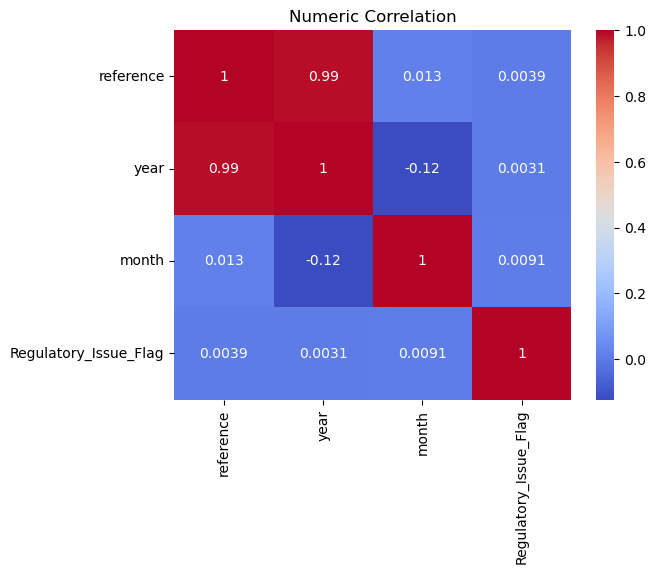

In [8]:
#Numeric correlation
numeric_corr = rasff[numeric_cols].corr()
sns.heatmap(numeric_corr, annot=True, cmap='coolwarm')
plt.title("Numeric Correlation")
plt.show()

In [9]:
cat_corr = pd.DataFrame(index=categorical_cols, columns=categorical_cols)

for col1 in categorical_cols:
    for col2 in categorical_cols:
        cat_corr.loc[col1, col2] = cramers_v(rasff[col1], rasff[col2])

cat_corr = cat_corr.astype(float)
sns.heatmap(cat_corr, annot=True, cmap='coolwarm')
plt.title("Categorical Correlation (Cramér's V)")
plt.show()

MemoryError: Unable to allocate 4.28 GiB for an array with shape (574560900,) and data type float64

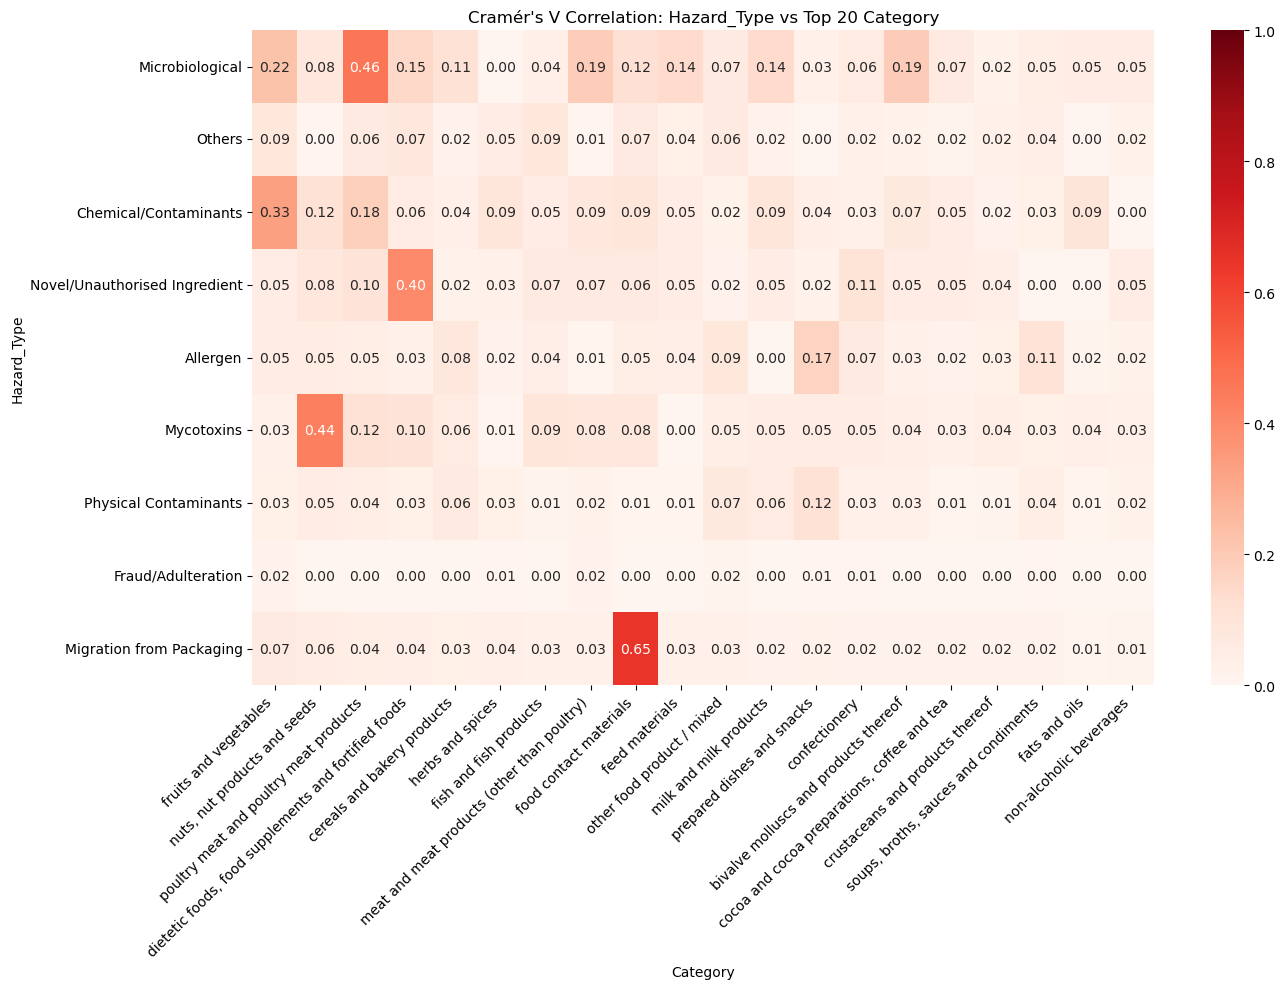

In [55]:
import pandas as pd

top_categories = rasff['category'].value_counts().nlargest(20).index
rasff_top20 = rasff[rasff['category'].isin(top_categories)]

import numpy as np
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1),(rcorr-1)))

# Get unique hazard types
hazard_types = rasff_top20['Hazard_Type'].unique()

# Initialize matrix
corr_matrix = pd.DataFrame(index=hazard_types, columns=top_categories)

# Compute Cramér's V for each pair
for h in hazard_types:
    for c in top_categories:
        corr_matrix.loc[h, c] = cramers_v(rasff_top20['Hazard_Type'] == h,
                                          rasff_top20['category'] == c)

corr_matrix = corr_matrix.astype(float)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="Reds", vmin=0, vmax=1)
plt.title("Cramér's V Correlation: Hazard_Type vs Top 20 Category")
plt.xlabel("Category")
plt.ylabel("Hazard_Type")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_28232\787161430.py:18: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr-1),(rcorr-1)))
C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_28232\787161430.py:18: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr-1),(rcorr-1)))
C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_28232\787161430.py:18: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr-1),(rcorr-1)))
C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_28232\787161430.py:18: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr-1),(rcorr-1)))
C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_28232\787161430.py:18: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr-1),(rcorr-1)))
C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_28232\787161430.py:18: RuntimeWarning: inval

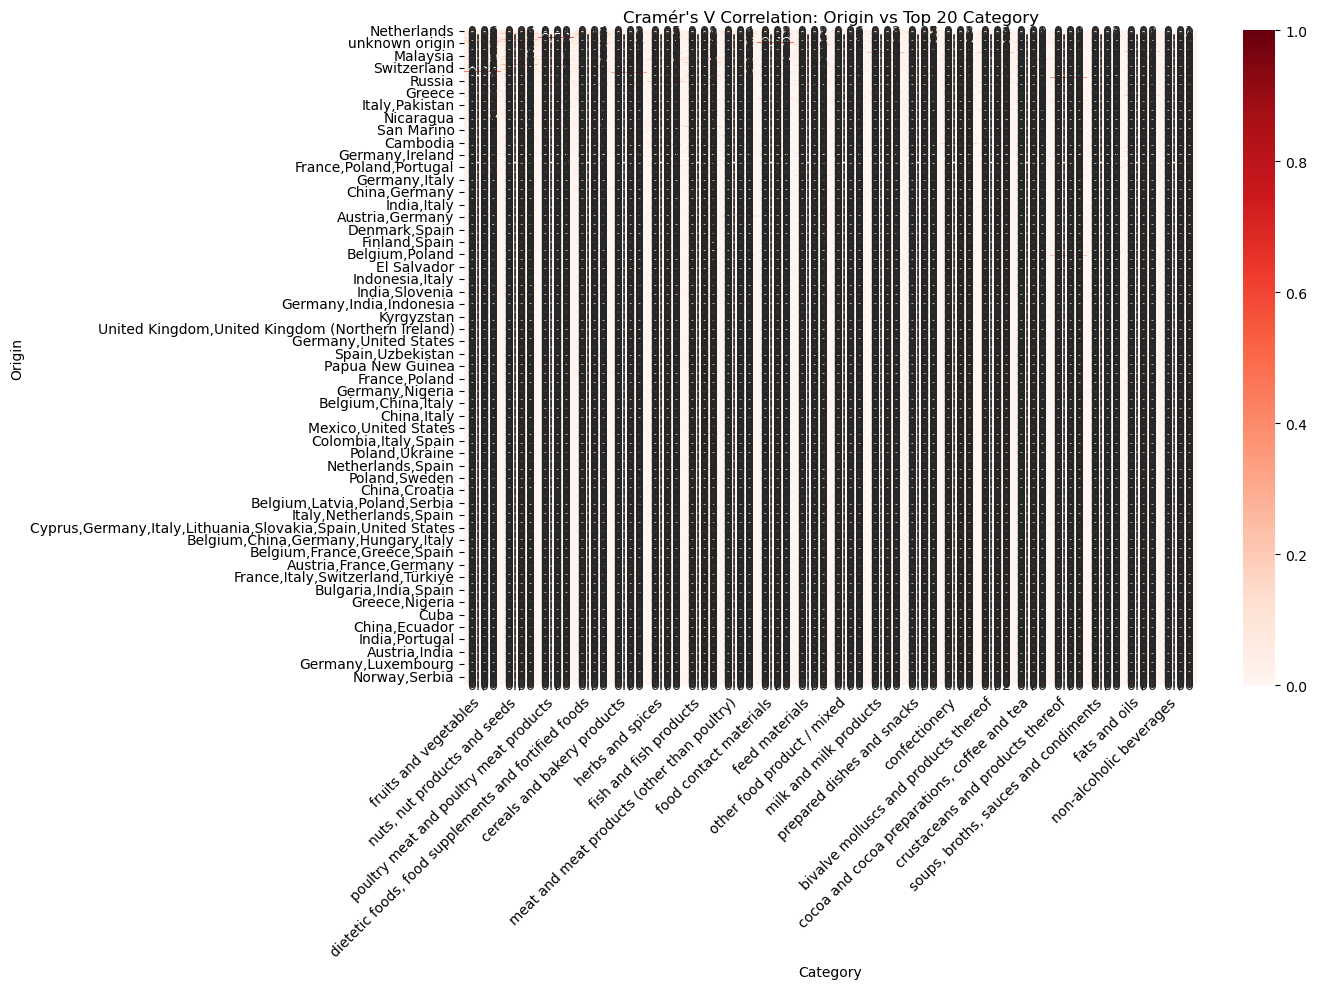

In [ ]:
import pandas as pd

top_categories = rasff['category'].value_counts().nlargest(20).index
rasff_top20 = rasff[rasff['category'].isin(top_categories)]


top_origin = rasff['origin'].value_counts().nlargest(20).index
rasff_top20 = rasff[rasff['origin'].isin(top_origin)]

import numpy as np
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1),(rcorr-1)))

# Get unique origin
origin = rasff_top20['origin'].unique()

# Initialize matrix
corr_matrix = pd.DataFrame(index=origin, columns=top_categories)

# Compute Cramér's V for each pair
for h in origin:
    for c in top_categories:
        corr_matrix.loc[h, c] = cramers_v(rasff_top20['origin'] == h,
                                          rasff_top20['category'] == c)

corr_matrix = corr_matrix.astype(float)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="Reds", vmin=0, vmax=1)
plt.title("Cramér's V Correlation: Origin vs Top 20 Category")
plt.xlabel("Category")
plt.ylabel("Origin")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [10]:
from scipy.stats import chi2_contingency
import numpy as np
import pandas as pd

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Example
score = cramers_v(rasff['classification'], rasff['risk_decision'])
print("Cramér's V:", score)

Cramér's V: 0.3095866549805628


In [14]:
rasff['classification'].value_counts()

classification
border rejection notification             8420
alert notification                        7995
information notification for attention    6287
information notification for follow-up    4692
non-compliance notification                  3
Name: count, dtype: int64

In [10]:
rasff_filtered = rasff[rasff['classification'] != 'non-compliance notification']

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

cross_tab = pd.crosstab(rasff_filtered['classification'], rasff_filtered['risk_decision'])

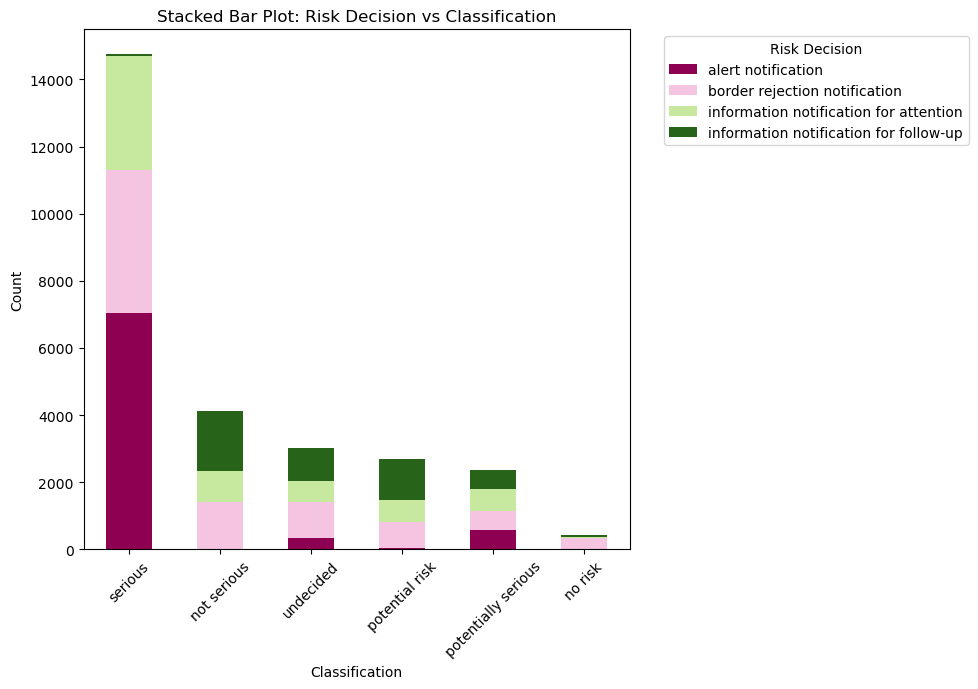

In [14]:
cross_tab['total'] = cross_tab.sum(axis=1)
cross_tab = cross_tab.sort_values('total', ascending=False)
cross_tab = cross_tab.drop(columns='total')

cross_tab.plot(kind='bar', stacked=True, figsize=(10,7), colormap='PiYG')
plt.ylabel("Count")
plt.xlabel("Classification")
plt.title("Stacked Bar Plot: Risk Decision vs Classification")
plt.legend(title='Risk Decision', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

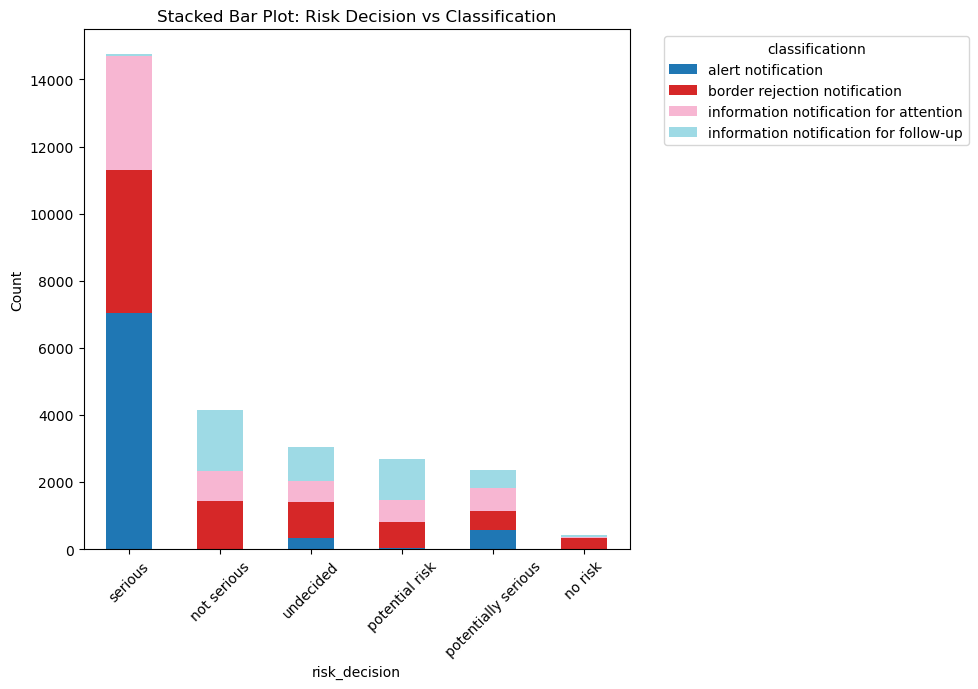

In [13]:
cross_tab = pd.crosstab(rasff_filtered['risk_decision'], rasff_filtered['classification'] )

cross_tab['total'] = cross_tab.sum(axis=1)
cross_tab = cross_tab.sort_values('total', ascending=False)
cross_tab = cross_tab.drop(columns='total')

cross_tab.plot(kind='bar', stacked=True, figsize=(10,7), colormap='tab20')
plt.ylabel("Count")
plt.xlabel("risk_decision")
plt.title("Stacked Bar Plot: Risk Decision vs Classification")
plt.legend(title='classificationn', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [39]:
rasff_filtered['origin'].value_counts().nlargest(20).index

Index(['Türkiye', 'Poland', 'India', 'China', 'Netherlands', 'France', 'Spain',
       'United States', 'Germany', 'Italy', 'Egypt', 'Brazil', 'Belgium',
       'United Kingdom', 'Ukraine', 'Vietnam', 'Pakistan', 'Thailand',
       'Argentina', 'Nigeria'],
      dtype='object', name='origin')

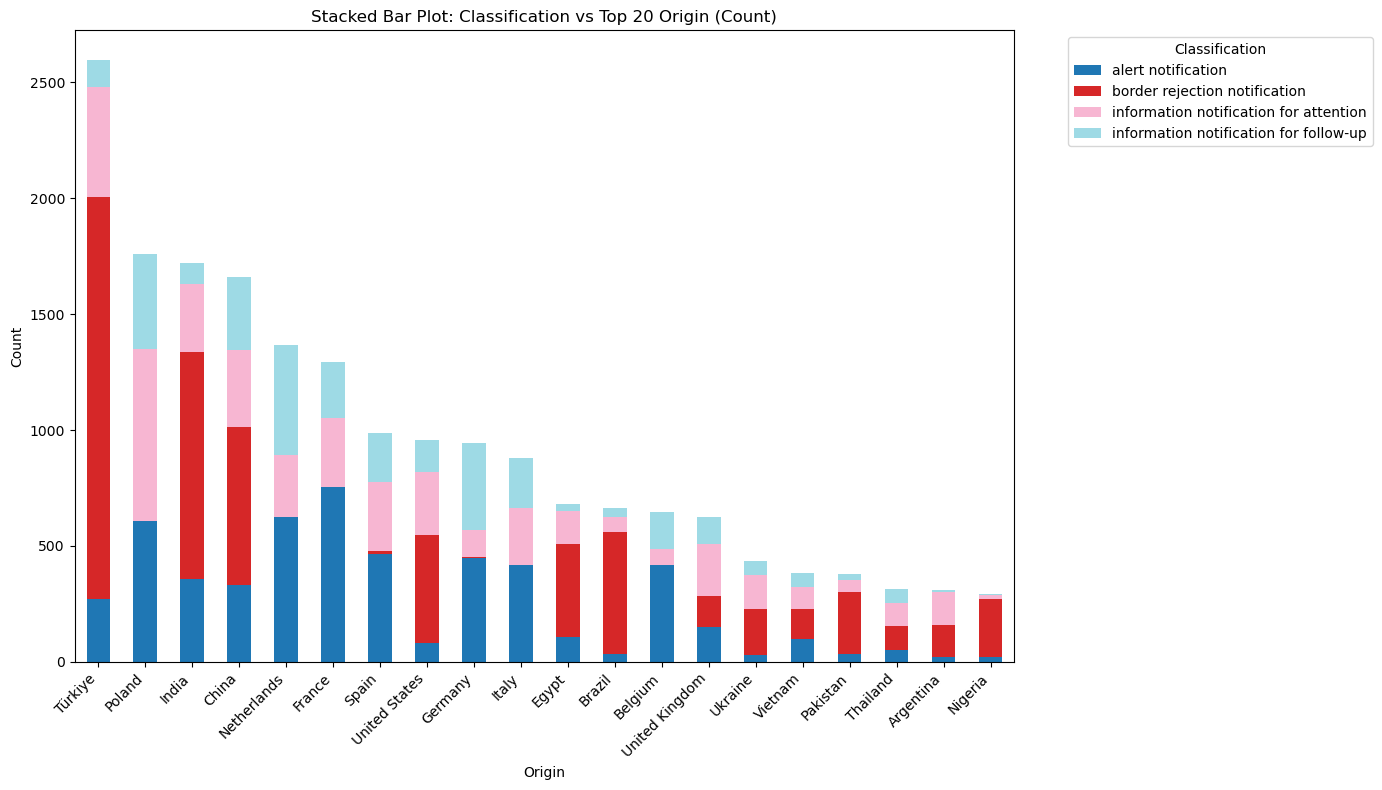

In [40]:
top_origin = rasff_filtered['origin'].value_counts().nlargest(20).index

rasff_top20 = rasff_filtered[rasff_filtered['origin'].isin(top_origin)]

cross_tab = pd.crosstab(rasff_top20['origin'], rasff_top20['classification'])

cross_tab['total'] = cross_tab.sum(axis=1)
cross_tab = cross_tab.sort_values('total', ascending=False)
cross_tab = cross_tab.drop(columns='total')

cross_tab.plot(kind='bar', stacked=True, figsize=(14,8), colormap='tab20')
plt.ylabel("Count")
plt.xlabel("Origin")
plt.title("Stacked Bar Plot: Classification vs Top 20 Origin (Count)")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Classification', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

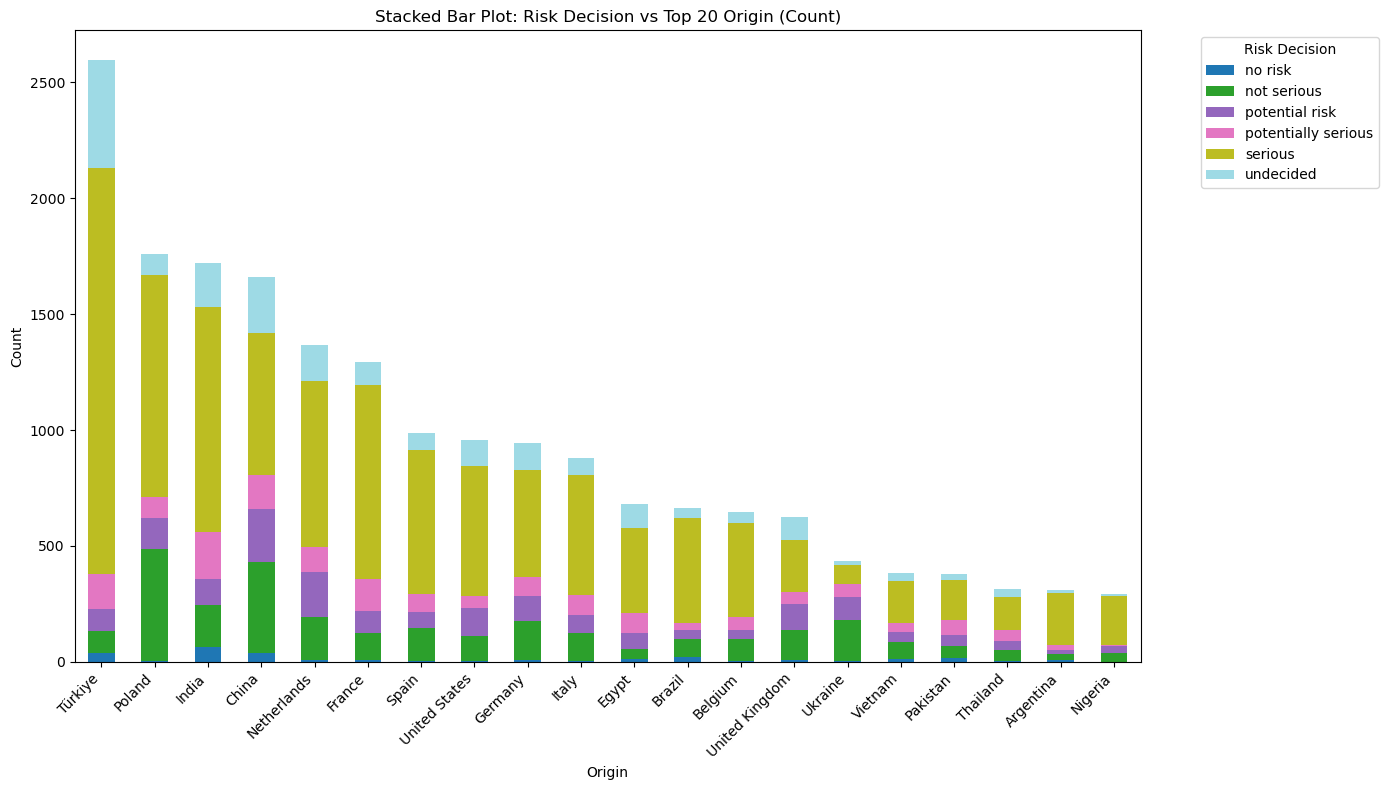

In [41]:
cross_tab = pd.crosstab(rasff_top20['origin'], rasff_top20['risk_decision'])

cross_tab['total'] = cross_tab.sum(axis=1)
cross_tab = cross_tab.sort_values('total', ascending=False)
cross_tab = cross_tab.drop(columns='total')

cross_tab.plot(kind='bar', stacked=True, figsize=(14,8), colormap='tab20')
plt.ylabel("Count")
plt.xlabel("Origin")
plt.title("Stacked Bar Plot: Risk Decision vs Top 20 Origin (Count)")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Risk Decision', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [20]:
top_categories = rasff_filtered['category'].value_counts().nlargest(10).index

In [21]:
rasff_top20 = rasff_filtered[rasff_filtered['category'].isin(top_categories)]

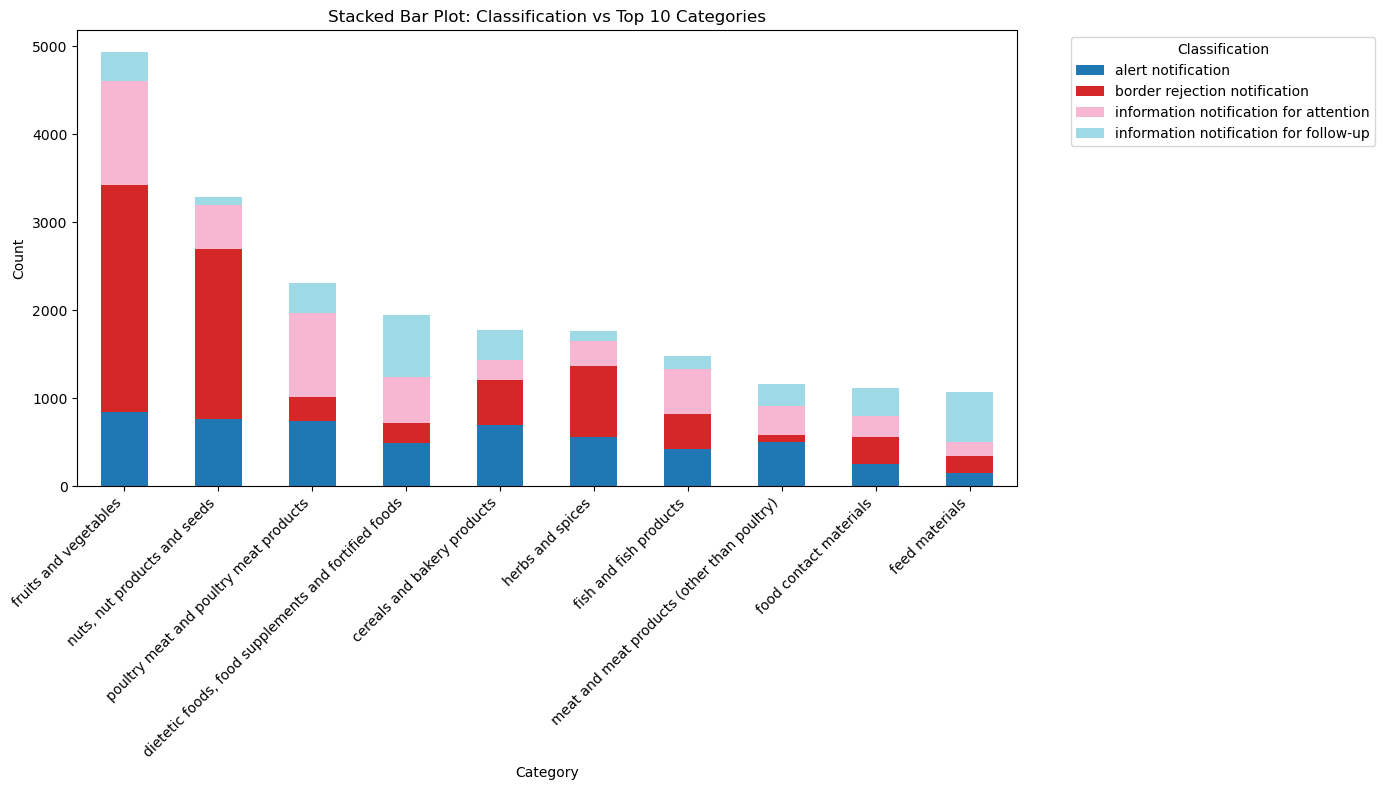

In [45]:
cross_tab = pd.crosstab(rasff_top20['category'], rasff_top20['classification'])

cross_tab['total'] = cross_tab.sum(axis=1)
cross_tab = cross_tab.sort_values('total', ascending=False)
cross_tab = cross_tab.drop(columns='total')

cross_tab.plot(kind='bar', stacked=True, figsize=(14,8), colormap='tab20')
plt.ylabel("Count")
plt.xlabel("Category")
plt.title("Stacked Bar Plot: Classification vs Top 10 Categories")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Classification', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

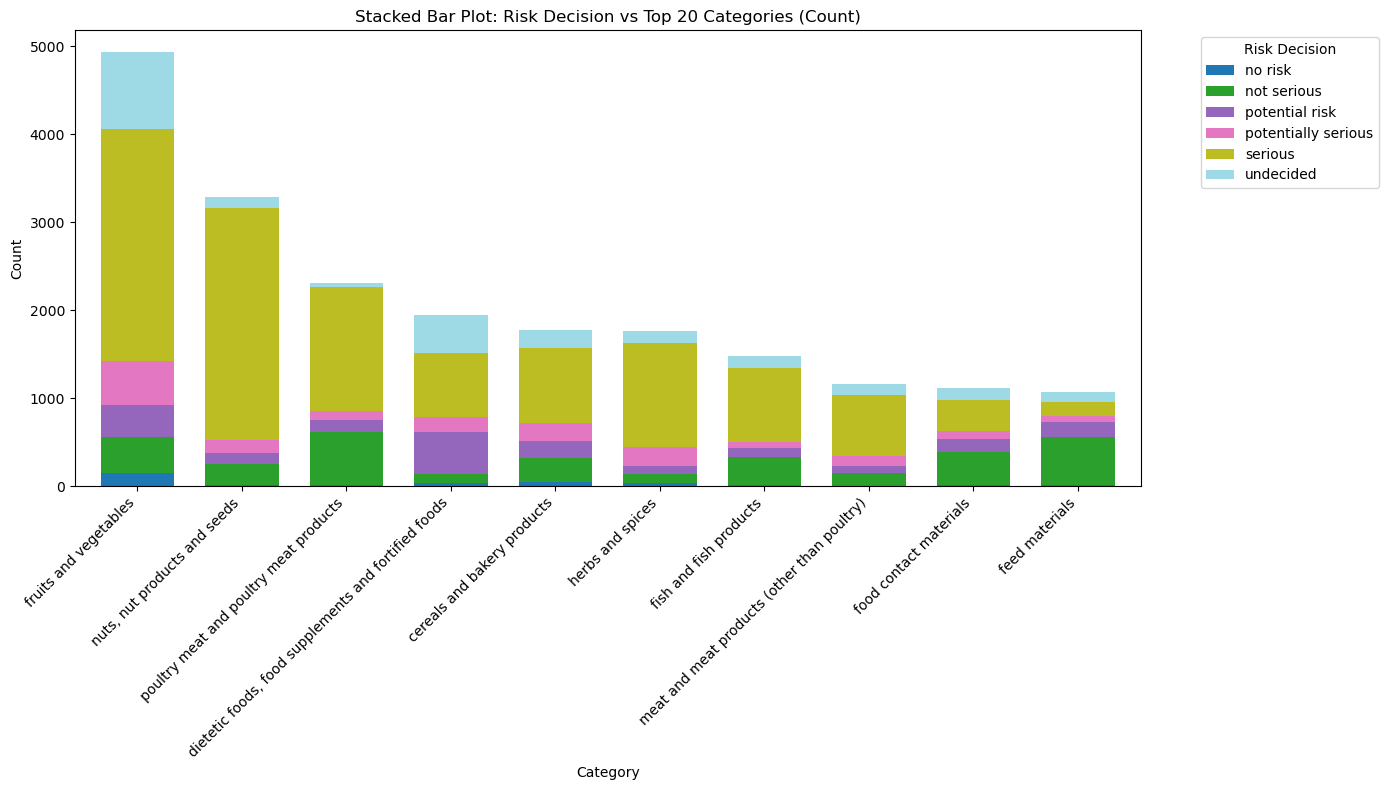

In [47]:
cross_tab = pd.crosstab(rasff_top20['category'], rasff_top20['risk_decision'])

cross_tab['total'] = cross_tab.sum(axis=1)
cross_tab = cross_tab.sort_values('total', ascending=False)
cross_tab = cross_tab.drop(columns='total')

cross_tab.plot(kind='bar', stacked=True, figsize=(14,8), colormap='tab20', width=0.7)
plt.ylabel("Count")
plt.xlabel("Category")
plt.title("Stacked Bar Plot: Risk Decision vs Top 20 Categories (Count)")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Risk Decision', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

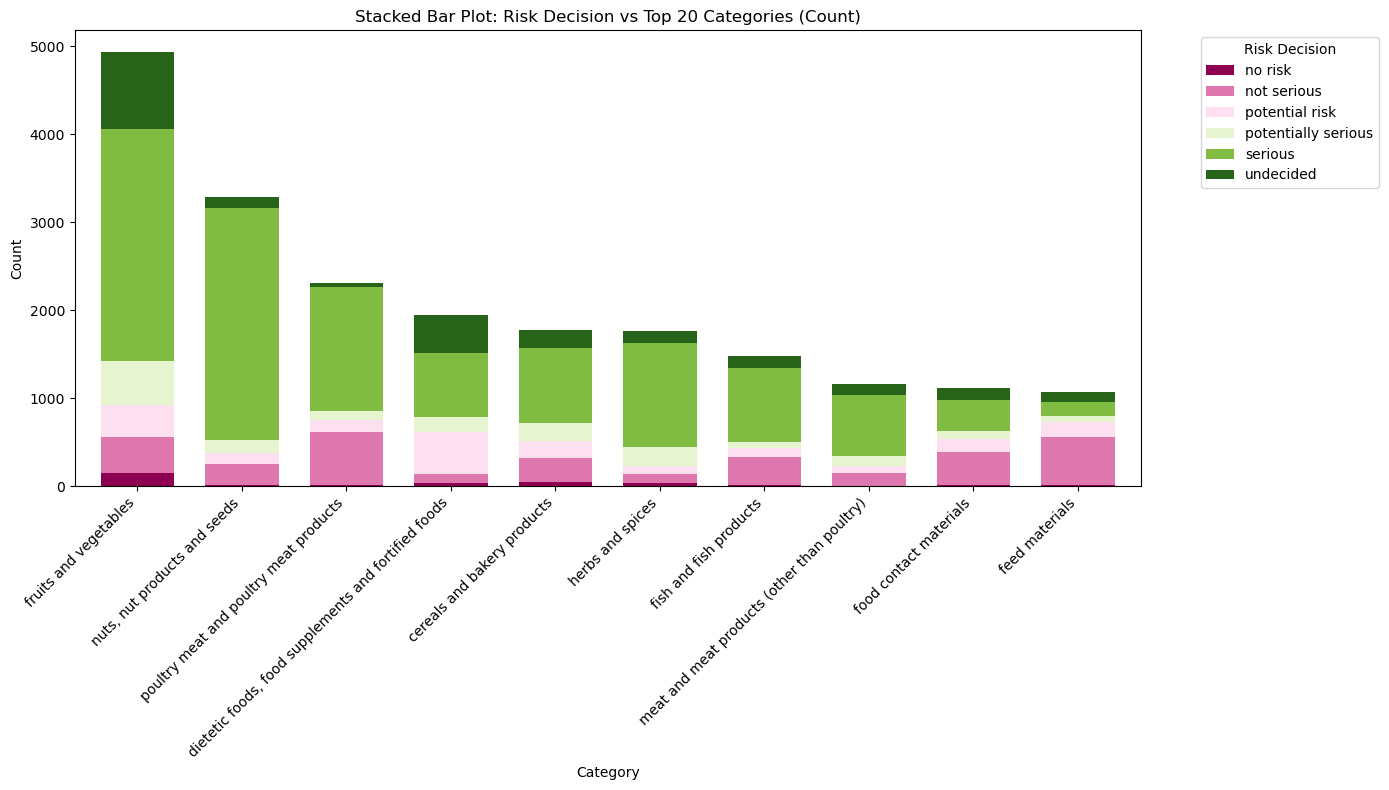

In [30]:
cross_tab.plot(
    kind='bar',
    stacked=True,
    figsize=(14,8),
    colormap='PiYG',
    width=0.7   # default is 0.8 → smaller number = more gap
)
plt.ylabel("Count")
plt.xlabel("Category")
plt.title("Stacked Bar Plot: Risk Decision vs Top 20 Categories (Count)")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Risk Decision', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

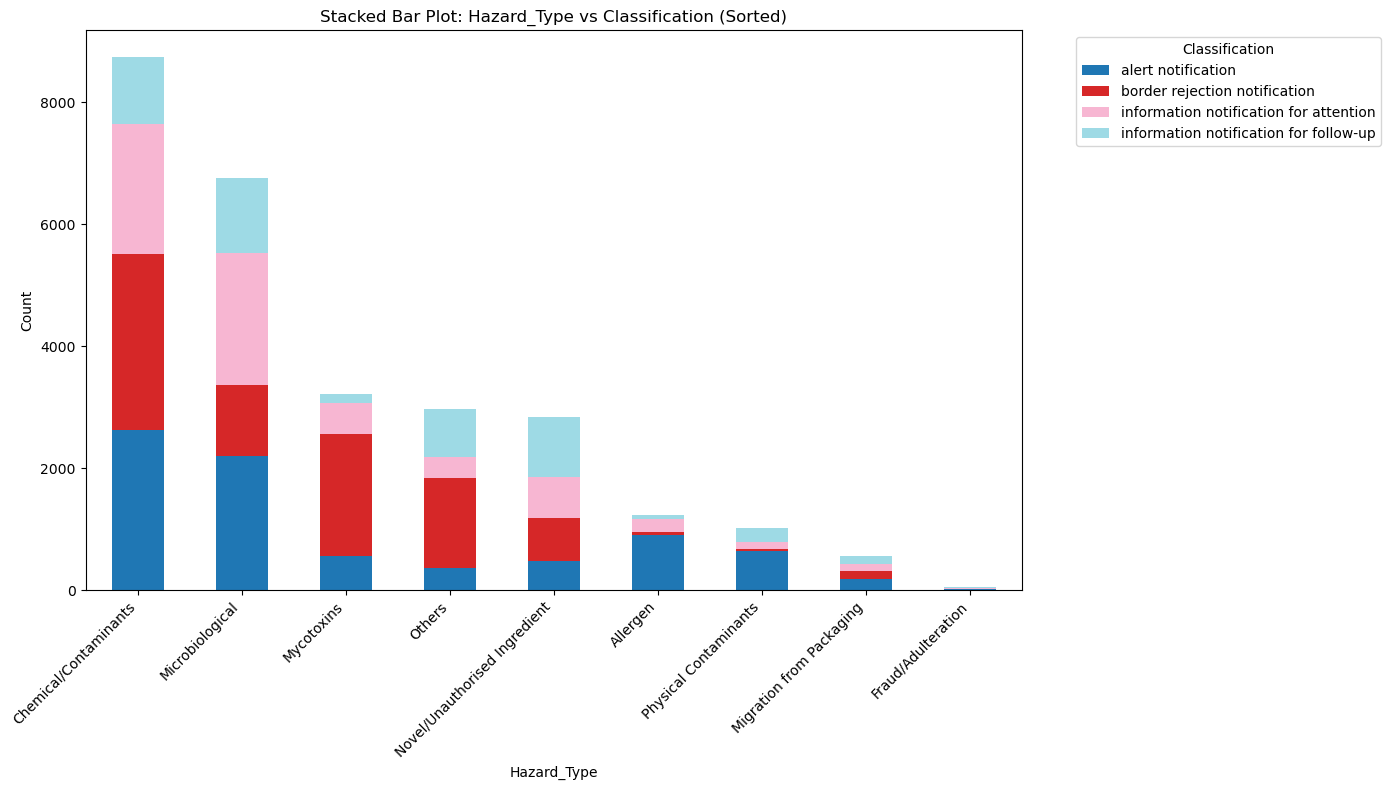

In [37]:
cross_tab = pd.crosstab(rasff_filtered['Hazard_Type'], rasff_filtered['classification'])

cross_tab['total'] = cross_tab.sum(axis=1)
cross_tab = cross_tab.sort_values('total', ascending=False)
cross_tab = cross_tab.drop(columns='total')

cross_tab.plot(kind='bar', stacked=True, figsize=(14,8), colormap='tab20')
plt.ylabel("Count")
plt.xlabel("Hazard_Type")
plt.title("Stacked Bar Plot: Hazard_Type vs Classification (Sorted)")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Classification', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

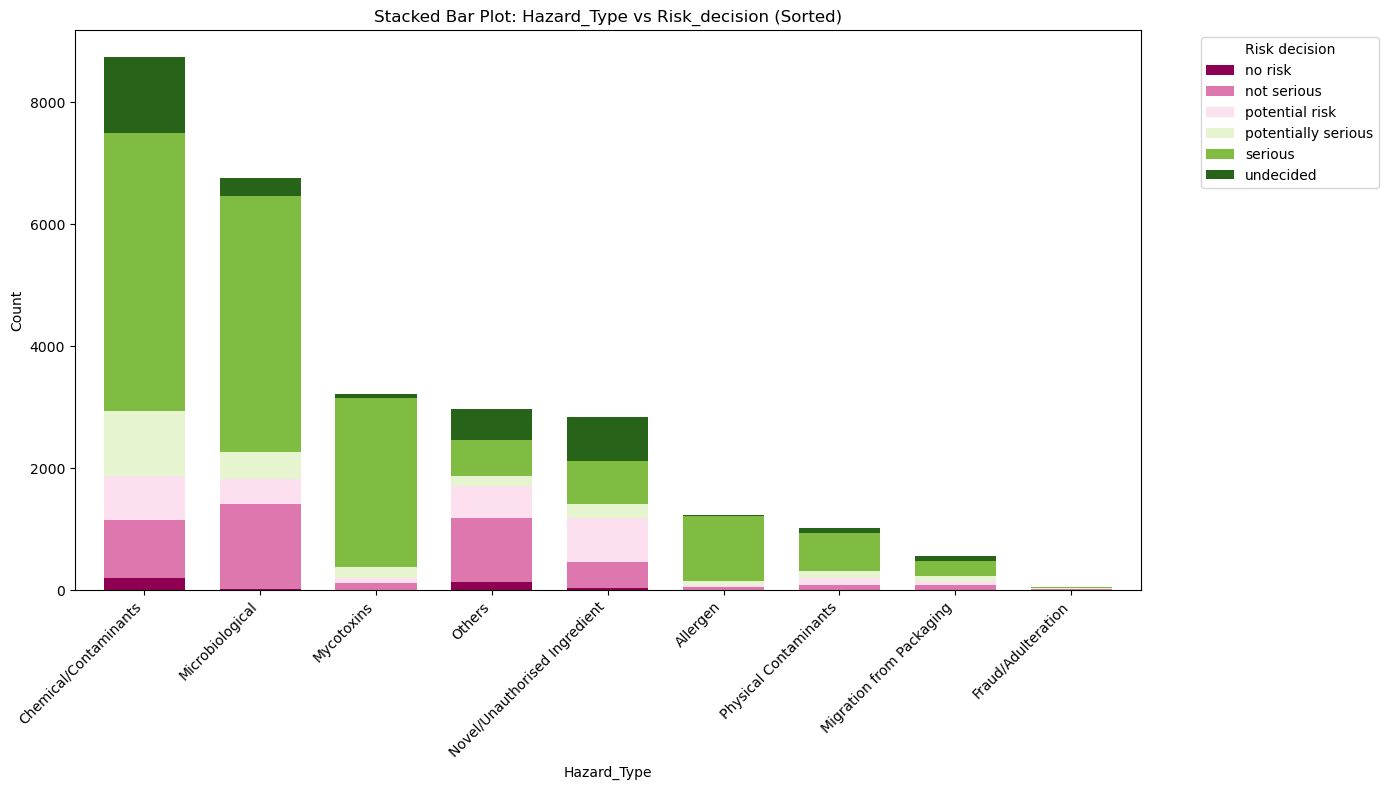

In [44]:
cross_tab = pd.crosstab(rasff_filtered['Hazard_Type'], rasff_filtered['risk_decision'])

cross_tab['total'] = cross_tab.sum(axis=1)
cross_tab = cross_tab.sort_values('total', ascending=False)
cross_tab = cross_tab.drop(columns='total')

cross_tab.plot(kind='bar', stacked=True, figsize=(14,8), colormap='PiYG',
    width=0.7 )
plt.ylabel("Count")
plt.xlabel("Hazard_Type")
plt.title("Stacked Bar Plot: Hazard_Type vs Risk_decision (Sorted)")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Risk decision', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

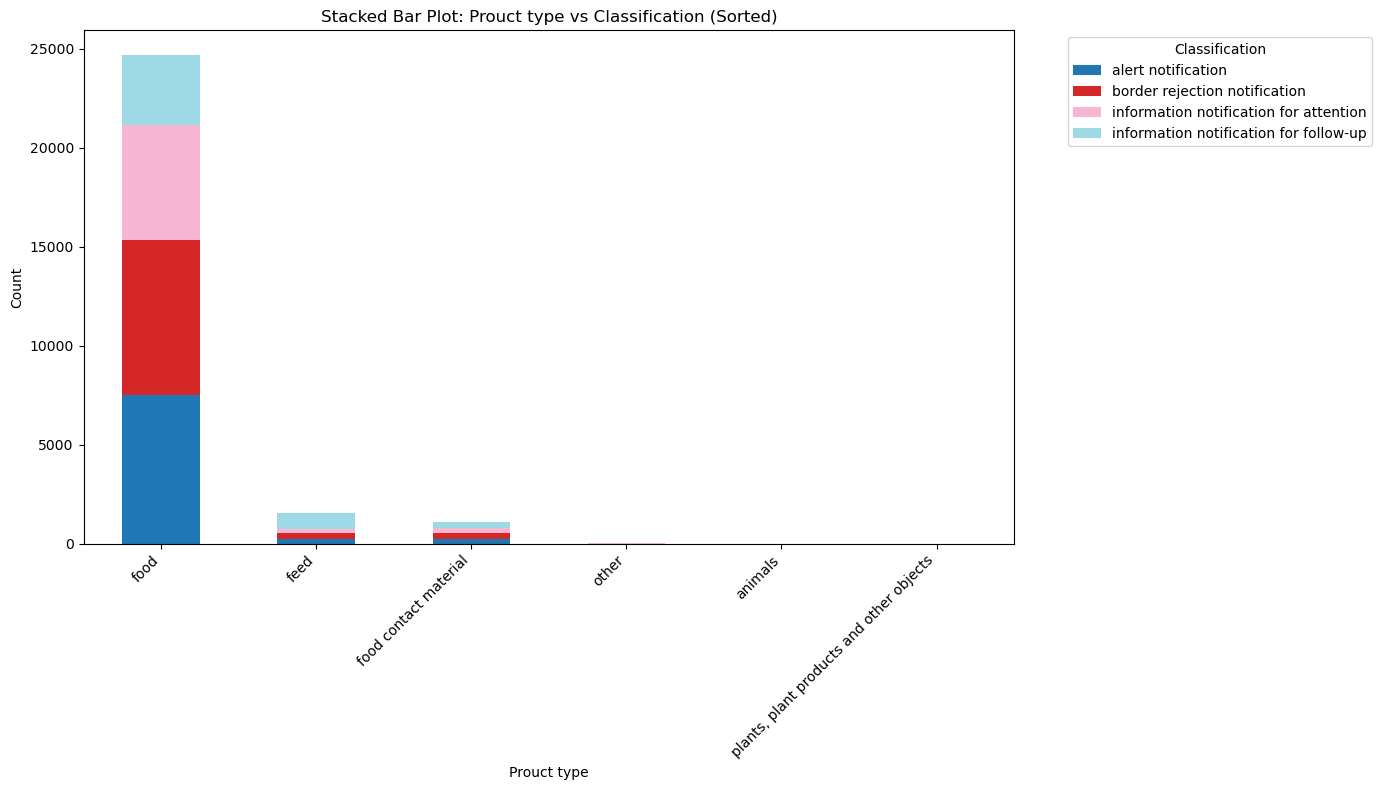

In [47]:
cross_tab = pd.crosstab(rasff_filtered['type'], rasff_filtered['classification'])

cross_tab['total'] = cross_tab.sum(axis=1)
cross_tab = cross_tab.sort_values('total', ascending=False)
cross_tab = cross_tab.drop(columns='total')

cross_tab.plot(kind='bar', stacked=True, figsize=(14,8), colormap='tab20')
plt.ylabel("Count")
plt.xlabel("Prouct type")
plt.title("Stacked Bar Plot: Prouct type vs Classification (Sorted)")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Classification', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

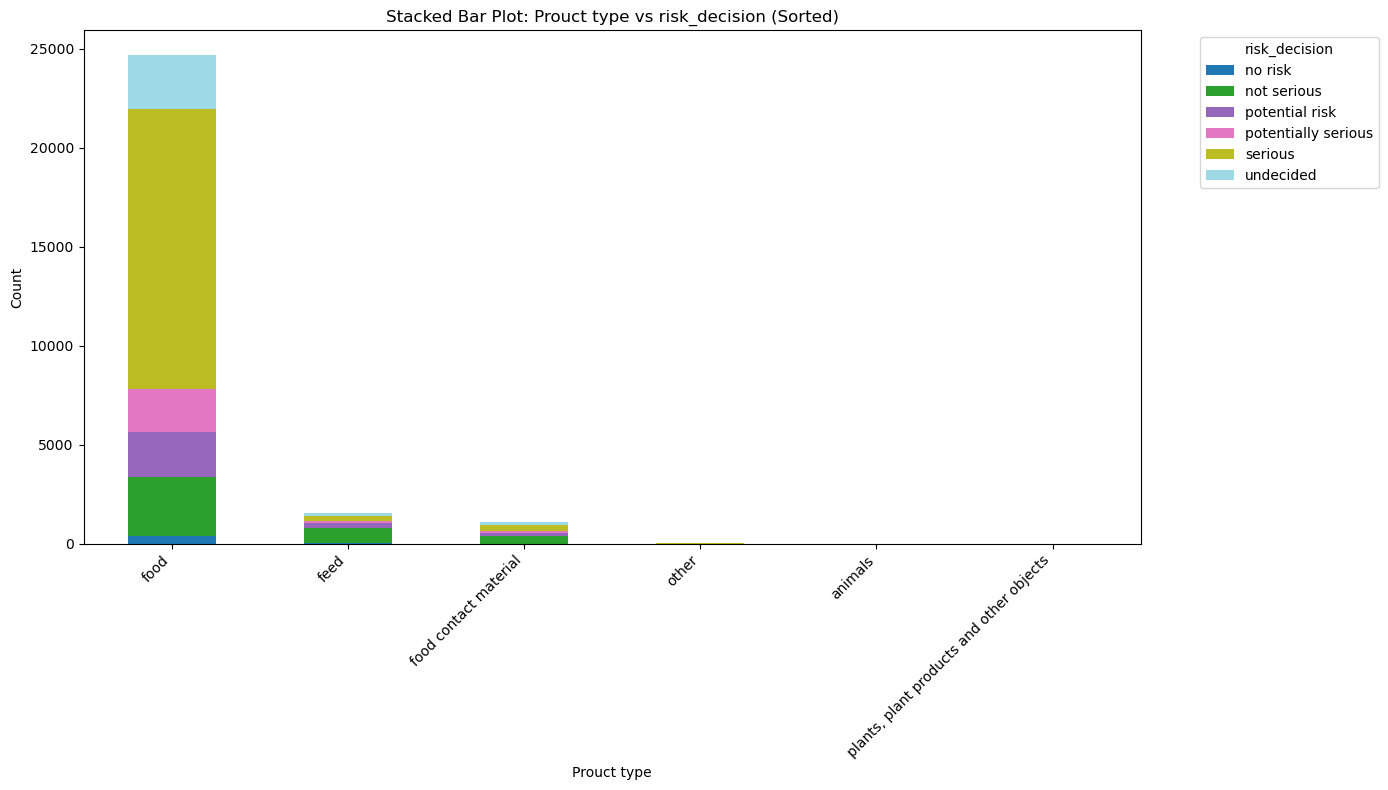

In [48]:
cross_tab = pd.crosstab(rasff_filtered['type'], rasff_filtered['risk_decision'])

cross_tab['total'] = cross_tab.sum(axis=1)
cross_tab = cross_tab.sort_values('total', ascending=False)
cross_tab = cross_tab.drop(columns='total')

cross_tab.plot(kind='bar', stacked=True, figsize=(14,8), colormap='tab20')
plt.ylabel("Count")
plt.xlabel("Prouct type")
plt.title("Stacked Bar Plot: Prouct type vs risk_decision (Sorted)")
plt.xticks(rotation=45, ha='right')
plt.legend(title='risk_decision', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

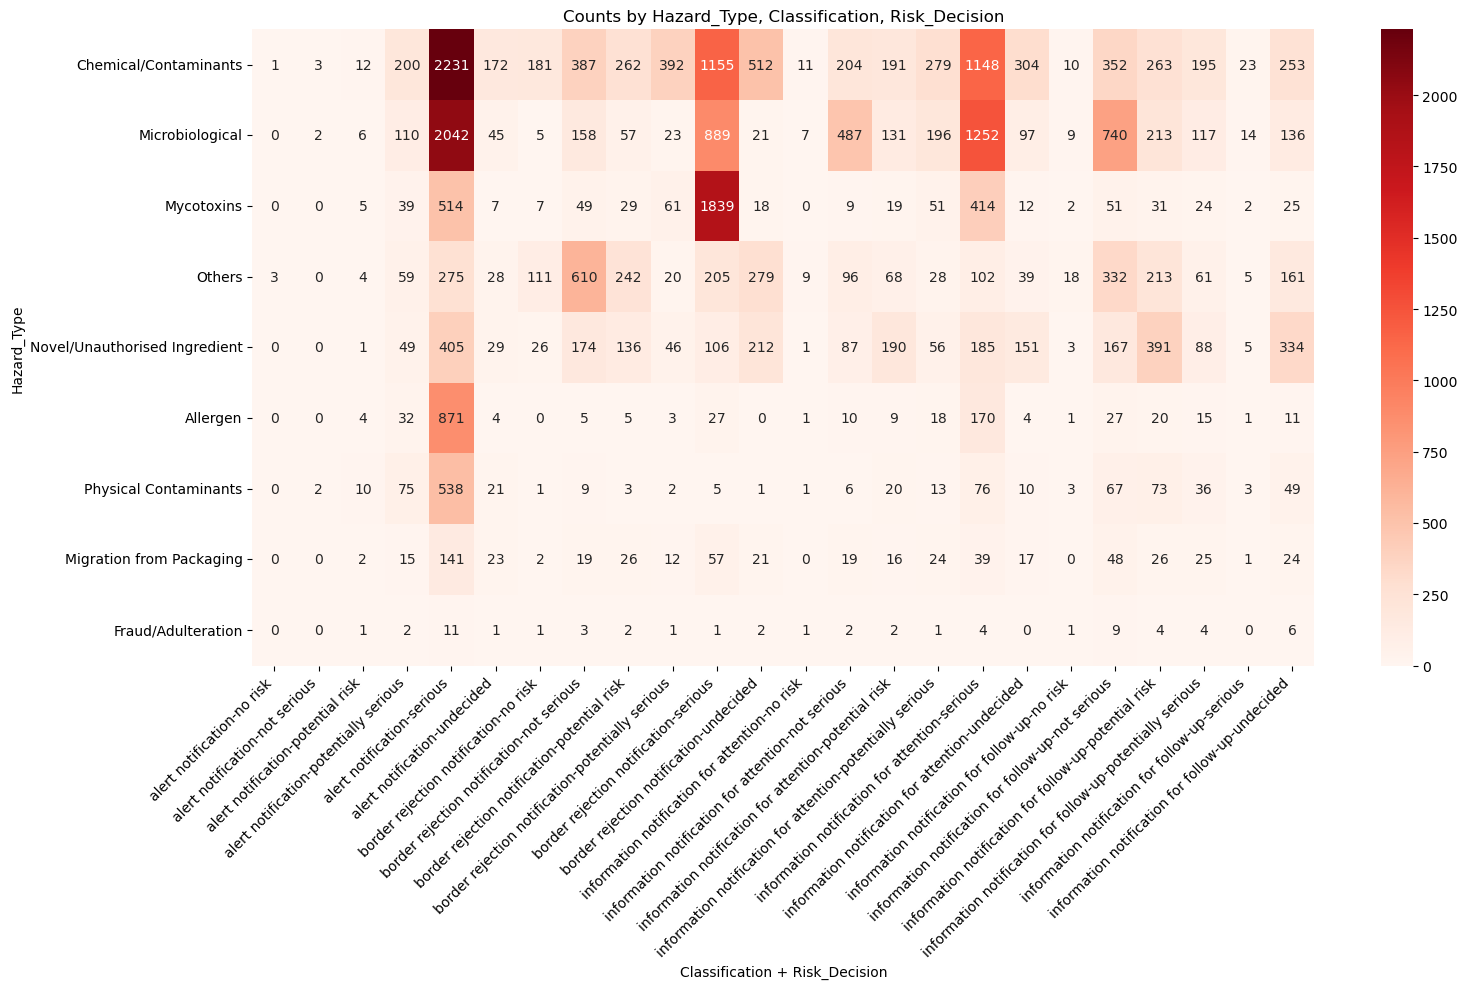

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot table: counts for classification vs risk_decision per hazard type
pivot = rasff_filtered.pivot_table(index='Hazard_Type', 
                                  columns=['classification','risk_decision'], 
                                  aggfunc='size', fill_value=0)

# Select top 20 hazard types
top_hazards = pivot.sum(axis=1).nlargest(20).index
pivot_top = pivot.loc[top_hazards]

# Plot heatmap
plt.figure(figsize=(16,10))
sns.heatmap(pivot_top, cmap='Reds', annot=True, fmt='d')
plt.title('Counts by Hazard_Type, Classification, Risk_Decision')
plt.ylabel('Hazard_Type')
plt.xlabel('Classification + Risk_Decision')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

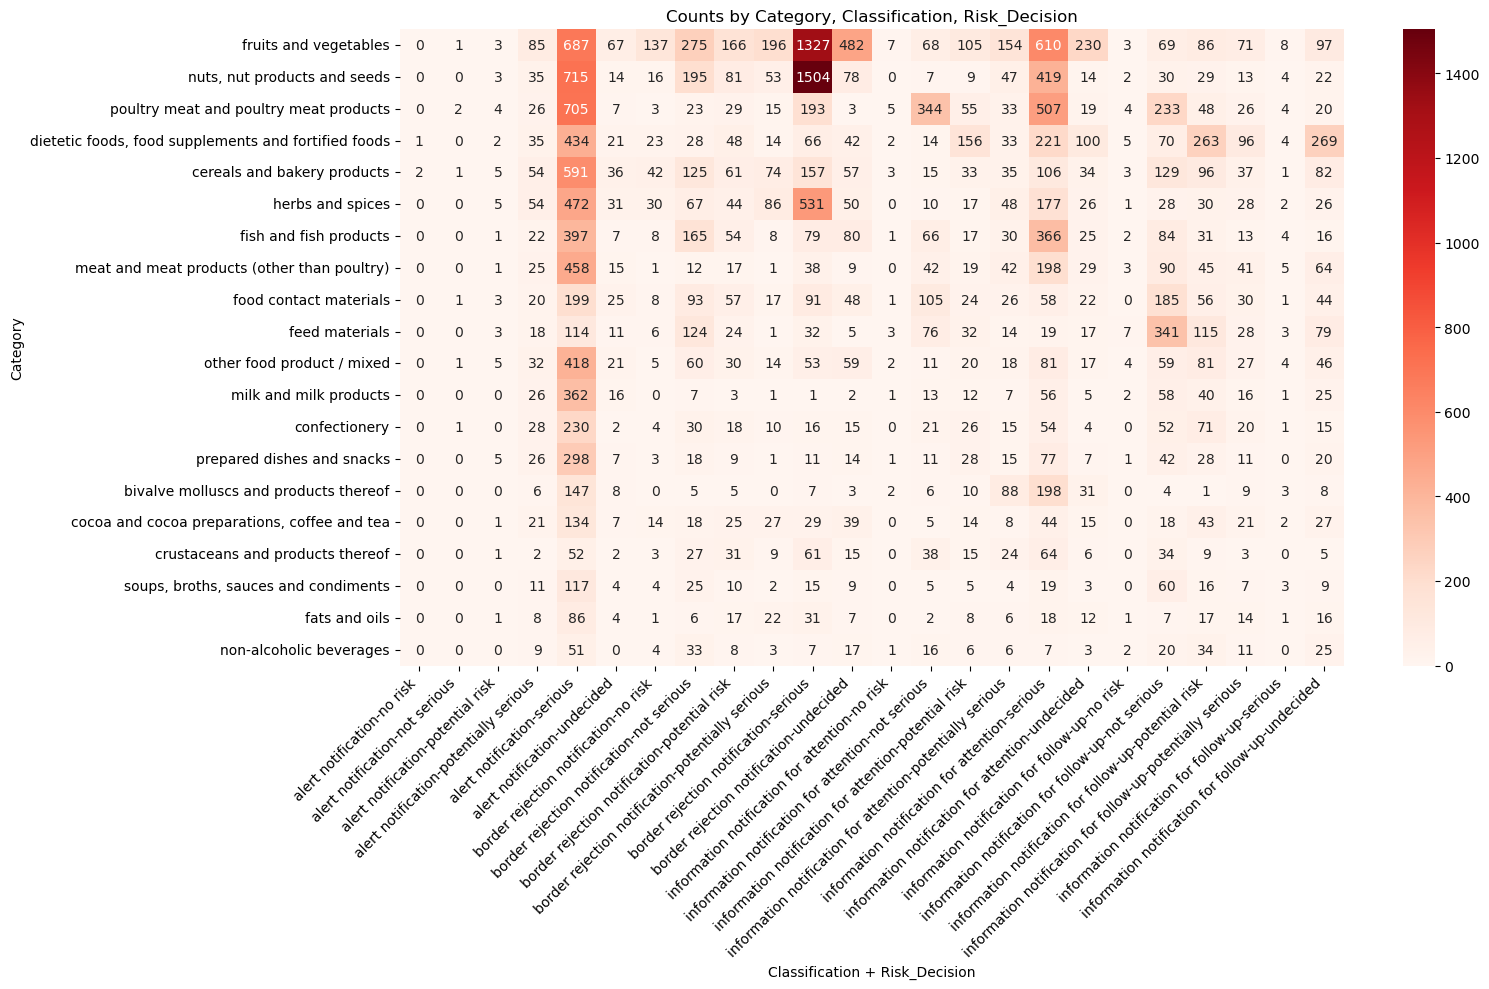

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot table: counts for classification vs risk_decision per hazard type
pivot = rasff_filtered.pivot_table(index='category', 
                                  columns=['classification','risk_decision'], 
                                  aggfunc='size', fill_value=0)

# Select top 20 hazard types
top_hazards = pivot.sum(axis=1).nlargest(20).index
pivot_top = pivot.loc[top_hazards]

# Plot heatmap
plt.figure(figsize=(16,10))
sns.heatmap(pivot_top, cmap='Reds', annot=True, fmt='d')
plt.title('Counts by Category, Classification, Risk_Decision')
plt.ylabel('Category')
plt.xlabel('Classification + Risk_Decision')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

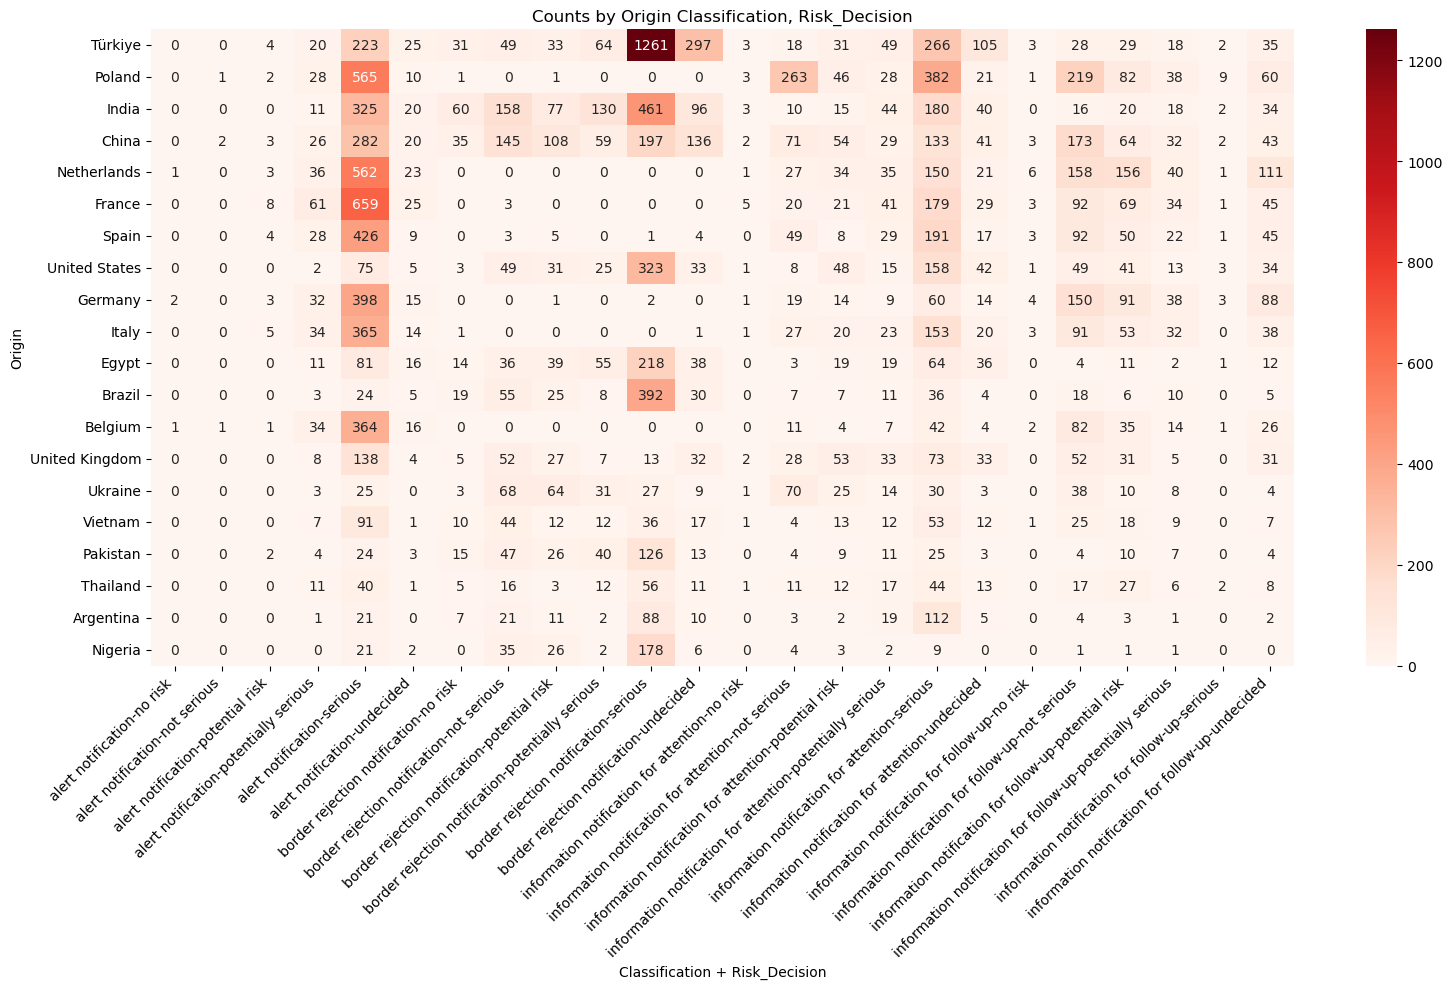

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot table: counts for classification vs risk_decision per hazard type
pivot = rasff_filtered.pivot_table(index='origin', 
                                  columns=['classification','risk_decision'], 
                                  aggfunc='size', fill_value=0)

# Select top 20 hazard types
top_hazards = pivot.sum(axis=1).nlargest(20).index
pivot_top = pivot.loc[top_hazards]

# Plot heatmap
plt.figure(figsize=(16,10))
sns.heatmap(pivot_top, cmap='Reds', annot=True, fmt='d')
plt.title('Counts by Origin Classification, Risk_Decision')
plt.ylabel('Origin')
plt.xlabel('Classification + Risk_Decision')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()